# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치

## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from random import random

In [4]:
noise = np.random.rand(100,1)


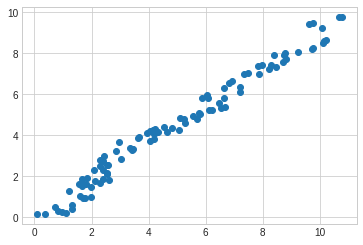

In [5]:
X = sorted(10 * np.random.rand(100,1)) + noise
Y = sorted(10 * np.random.rand(100))

plt.scatter(X,Y);

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [7]:
print("선형회귀 가중치{}".format(model.coef_))
print("편향{}". format(model.intercept_))

선형회귀 가중치[0.8995589]
편향0.05104807236789011


In [8]:
print("학습데이터 점수:", model.score(X_train,Y_train))
print("테스트 데이터 점수:", model.score(X_test,Y_test))

학습데이터 점수: 0.9763924152924776
테스트 데이터 점수: 0.9761532950328664


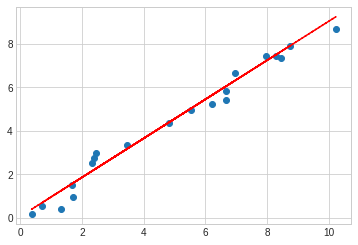

In [9]:
#예측값 구하기 sklearn 공부한것 참고 할것
predict = model.predict(X_test)

#산점도 만들기(테스트 데이터의 분포)
plt.scatter(X_test, Y_test)

#직선 만들기(학습을 통해 만들어낸 선형 모델)
#직선의 기울기 : print("선형회귀 가중치{}".format(model.coef_))
#직선의 y절편 : print("편향{}". format(model.intercept_))
plt.plot(X_test,predict,'--r')

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [10]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [11]:
import pandas as pd

boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
#medv를 tatget에 추가
boston_df["MEDV"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


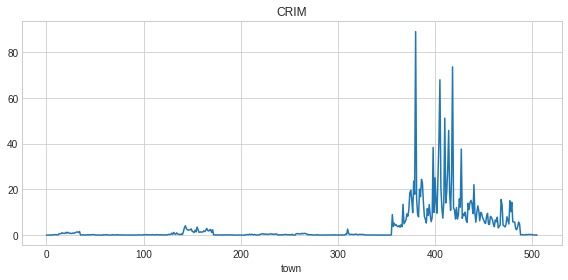

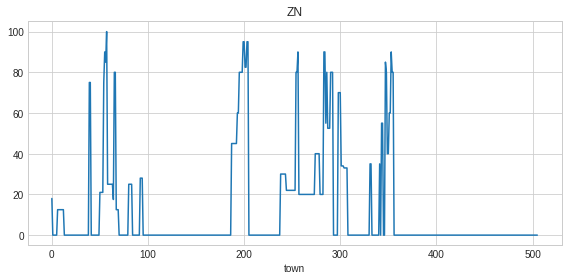

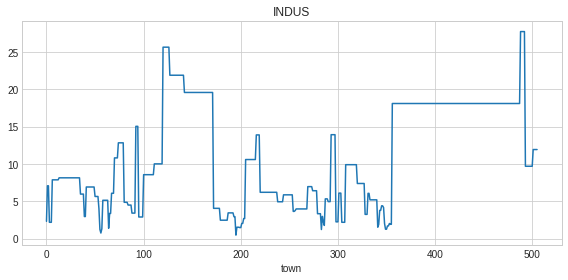

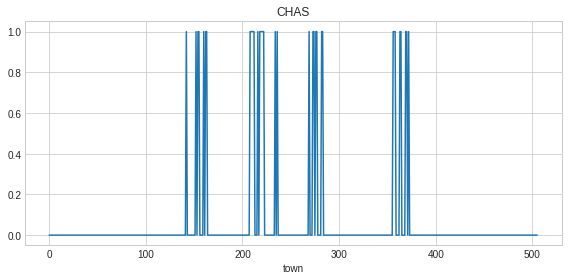

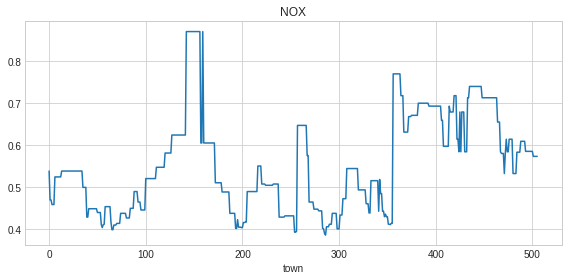

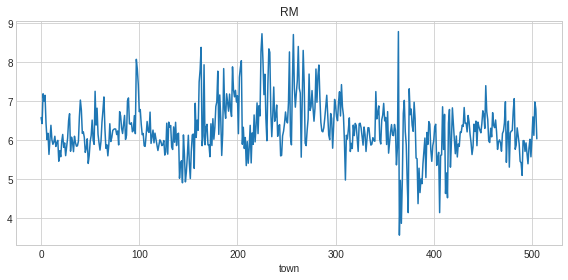

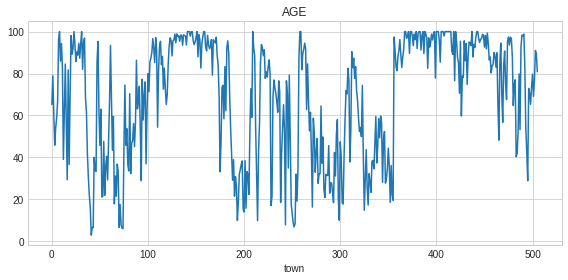

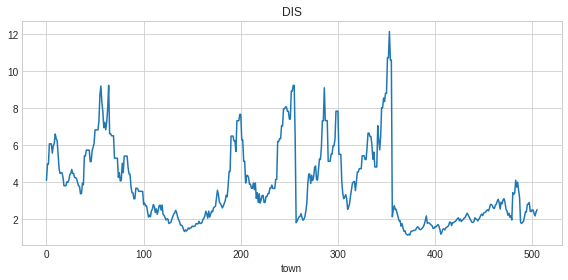

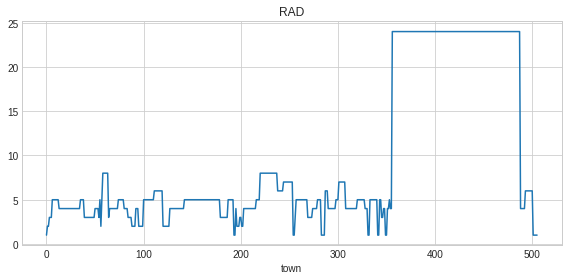

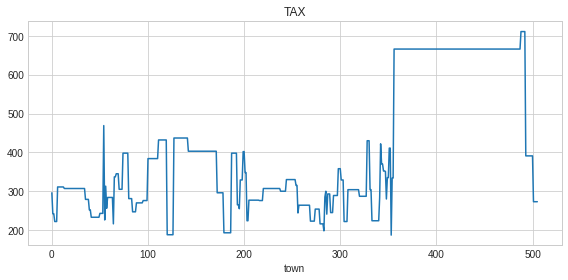

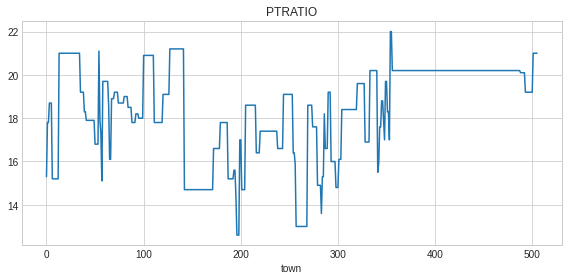

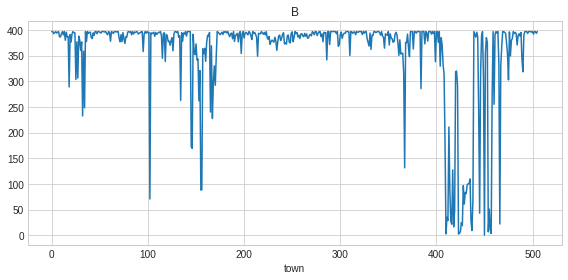

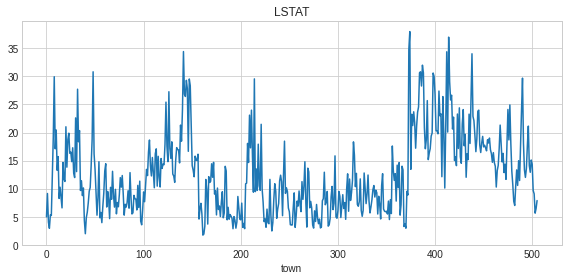

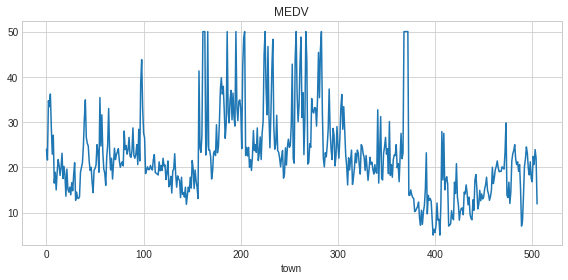

In [13]:
#모든 그래프를 시각화하자(데이터간의 상관관계 알아보기)
#enumerate함수는 리스트의 원소에 순서값을 부여해주는 함수
#순서가 있어야 차례로 그래프 구현
for i, col in enumerate(boston_df.columns):
#figsize ==> 그래프 크기  
  plt.figure(figsize = (8,4))
# boston_df의 목차를 하나씩 차트에 구현해라.
  plt.plot(boston_df[col])
#타이틀 이름도 하나씩 구현
  plt.title(col)
  plt.xlabel('town')
  plt.tight_layout()

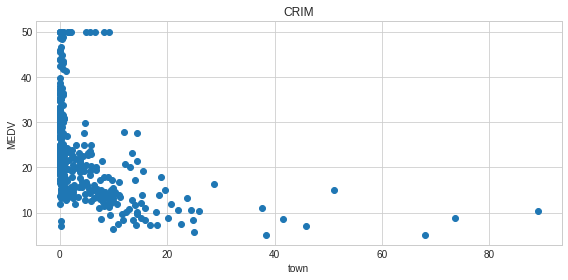

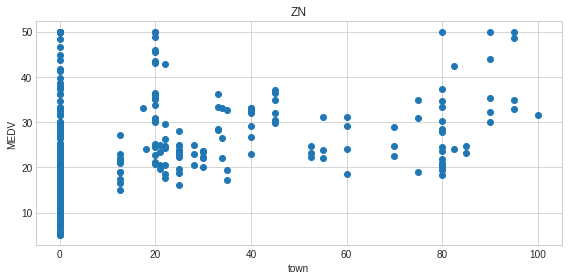

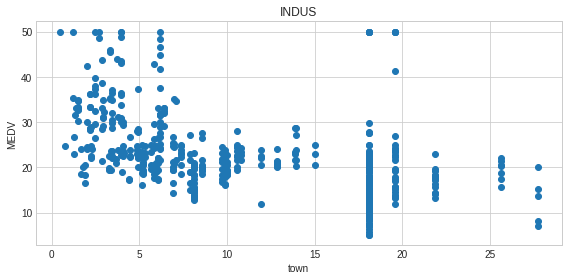

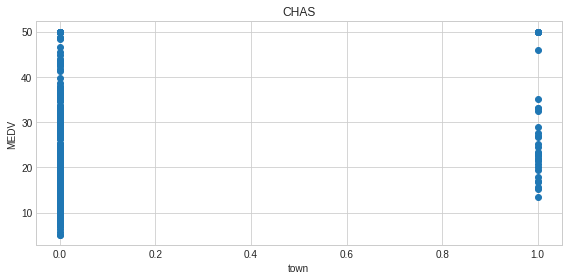

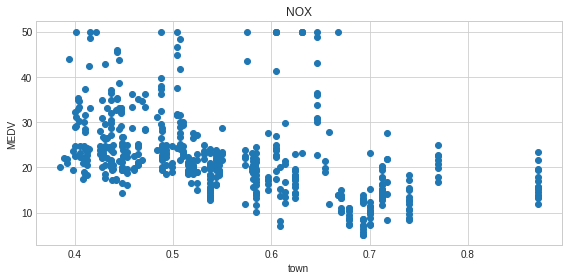

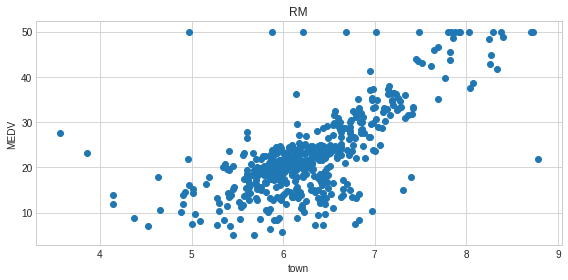

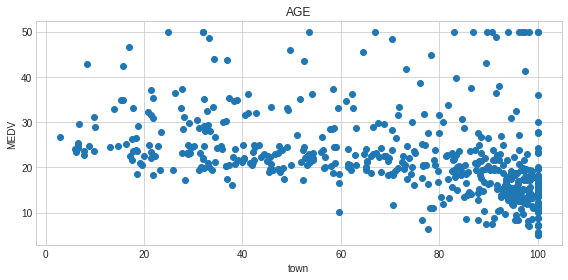

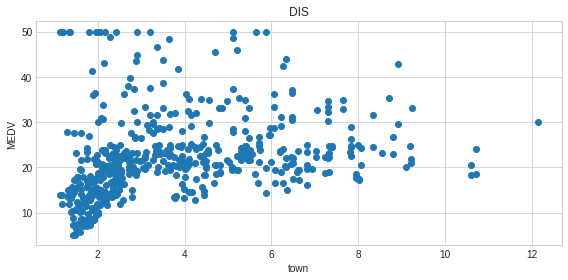

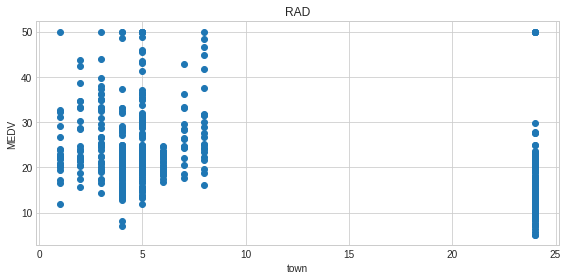

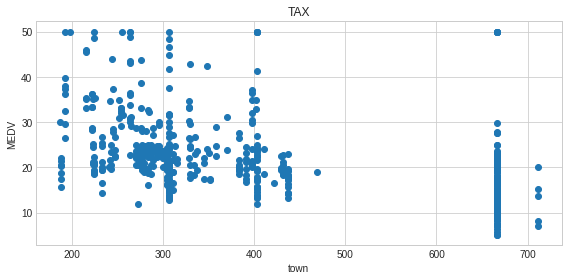

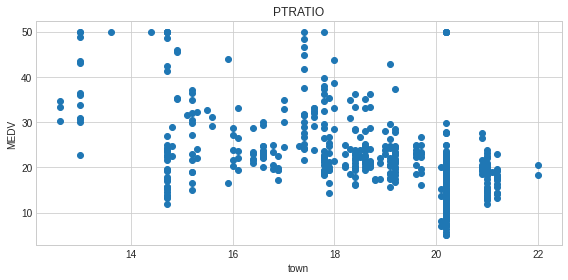

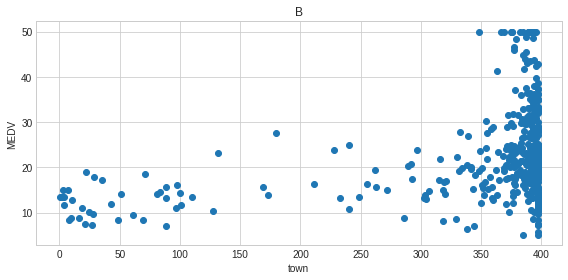

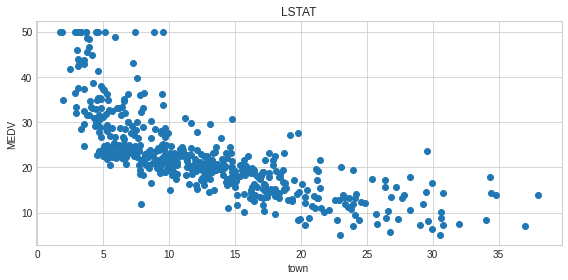

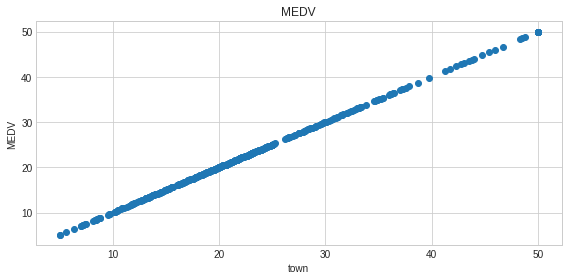

In [14]:
#모든 그래프를 시각화하자(데이터간의 상관관계 알아보기)
#특히 이제는 medv와 다른 요소들의 상관관계를 알아보는것
#enumerate함수는 리스트의 원소에 순서값을 부여해주는 함수
#순서가 있어야 차례로 그래프 구현
for i, col in enumerate(boston_df.columns):
#figsize ==> 그래프 크기  
  plt.figure(figsize = (8,4))
# boston_df의 목차를 하나씩 차트에 구현해라.
  plt.scatter(boston_df[col], boston_df['MEDV'])
#타이틀 이름도 하나씩 구현
  plt.title(col)
  plt.ylabel('MEDV')
  plt.xlabel('town')
  plt.tight_layout()

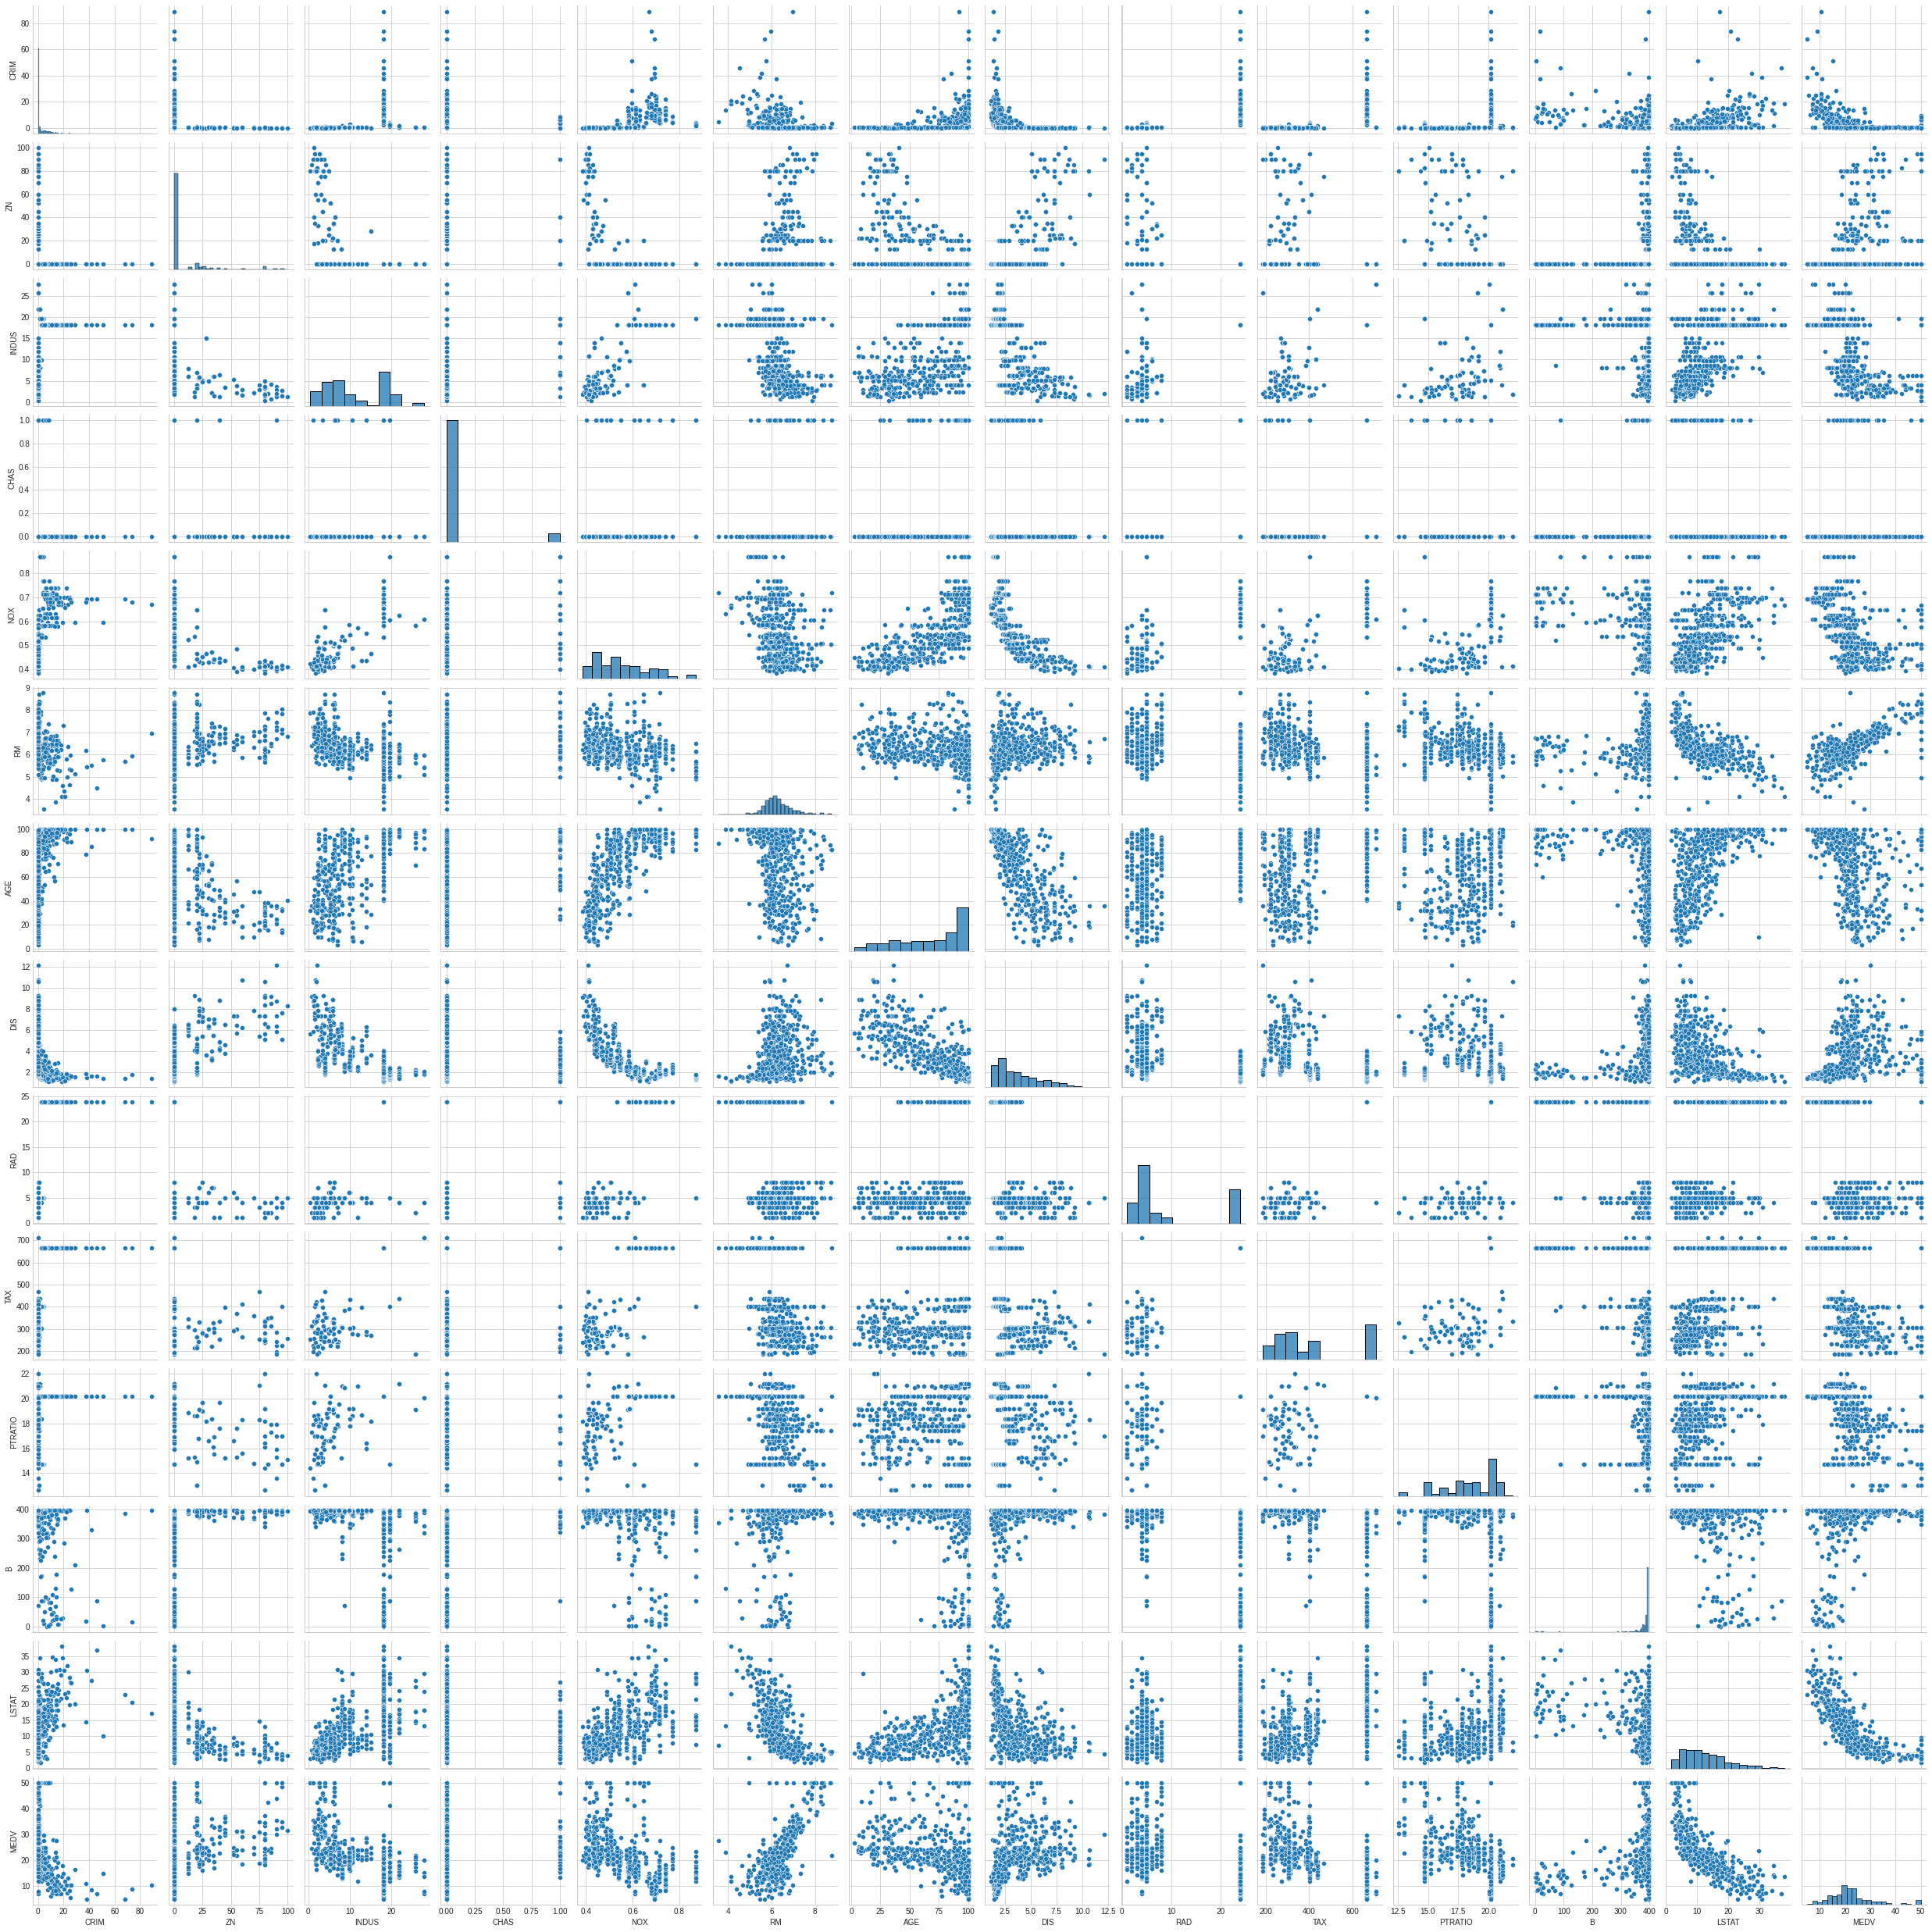

In [17]:
#모든 그래프를 시각화하자(데이터간의 상관관계 알아보기)
#모든 데이터간의 상관관계 알아보기
#싹 다 알아보기
import seaborn as sns

plt.show()

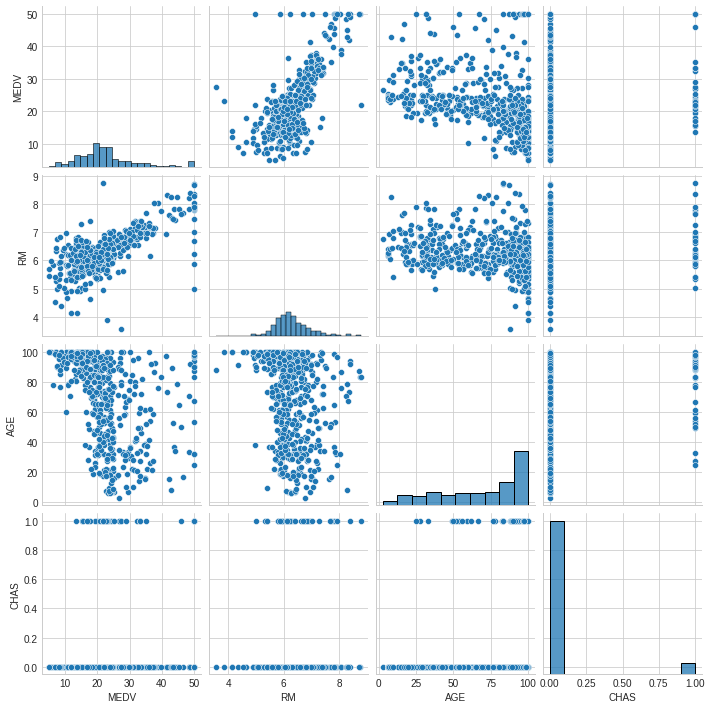

In [19]:
#비교하고싶은 데이터만 비교
sns.pairplot(boston_df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()